# CNN için giriş, data augmentation ve drop out olayları
## Kullandığım veriyi internetten kendim topladım.
    Kullandığım veride 2 tür resim vardır. Gömlek ve kol saati. Data augmentation'u daha iyi görebilmek amacıyla her ikisinden de ayrı ayrı 200 adet resim buldum. Resimlerin hepsi google fotoğraflardan alınmıştır. Kullandığım verinin linki : https://drive.google.com/drive/folders/1BkI94CNRtbBdjmimxwkbnzJH7nbHbDX7?usp=sharing

In [1]:
import keras 

C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


    İlk olarak keras'ı import ediyoruz.

In [10]:
import os, shutil

original_dataset_dir = '/Users/Oğuzhan/Desktop/project/birlesik/'

base_dir='/Users/Oğuzhan/Desktop/project/ayirma'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
##gereken klasörleri oluşturduk (train-test-validasyon)

train_shoes_dir=os.path.join(train_dir,'shoes')
os.mkdir(train_shoes_dir)

train_watchs_dir=os.path.join(train_dir,'watchs')
os.mkdir(train_watchs_dir)


validation_shoes_dir=os.path.join(validation_dir,'shoes')
os.mkdir(validation_shoes_dir)

validation_watchs_dir=os.path.join(validation_dir,'watchs')
os.mkdir(validation_watchs_dir)


test_shoes_dir=os.path.join(test_dir,'shoes')
os.mkdir(test_shoes_dir)

test_watchs_dir=os.path.join(test_dir,'watchs')
os.mkdir(test_watchs_dir)

##Yukarıda üç klasör için shoes ve watchs(ayakkabı ve kol saati)
## klasörleri oluşturduk

fnames = ['shoes.{}.jpg'.format(i) for i in range(100)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_shoes_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['shoes.{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_shoes_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['shoes.{}.jpg'.format(i) for i in range(150, 200)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_shoes_dir, fname)
    shutil.copyfile(src, dst)

## Yukarıda ise ayakkabılar için, train içine 100 adet resmi
## diğer iki klasör içine ise 50-50 resmi kopyaladık
    
fnames = ['watchs.{}.jpg'.format(i) for i in range(100)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_watchs_dir, fname)
    shutil.copyfile(src, dst)
    
    
fnames = ['watchs.{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_watchs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['watchs.{}.jpg'.format(i) for i in range(150, 200)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_watchs_dir, fname)
    shutil.copyfile(src, dst)
    
## Yukarıda ise kol saati içine train için 100 adet resmi
## diğer iki klasör içine ise 50-50 resmi kopyaladık

In [11]:
print('Train için ayrılan ayakkabı resmi:', len(os.listdir(train_shoes_dir)))

Train için ayrılan ayakkabı resmi: 100


In [12]:
print('Train için ayrılan kol saati resmi:', len(os.listdir(train_watchs_dir)
                                                ))

Train için ayrılan kol saati resmi: 100


In [13]:
print('Validation için ayrılan ayakkabı resmi:', len(os.listdir(validation_shoes_dir)))

Validation için ayrılan ayakkabı resmi: 50


In [14]:
print('Validation için ayrılan kol saati resmi:', len(os.listdir(validation_watchs_dir)))

Validation için ayrılan kol saati resmi: 50


In [15]:
print('Test için ayrılan ayakkabı resmi:', len(os.listdir(test_shoes_dir)))

Test için ayrılan ayakkabı resmi: 50


In [16]:
print('Test için ayrılan kol saati resmi:', len(os.listdir(test_watchs_dir)))

Test için ayrılan kol saati resmi: 50


# Katmanları oluşturma
Öncelikle kullandığımız katman modelinde Conv2D ve MaxPooling2D kullanılmıştır. İlk layer'da 32 adet node ve giriş şeklini (width-height oranını) en-boy oranını ayarladık. Bu katman için maxpooling yaptıktan sonra diğer katmanda 64 node kullandık. Yine maxpooling yaptıktan sonra 128 node'lik iki katman oluşturduk ve bu matrisleri Flatten() ile düzleştirdik.

Son olarak dense layer'ı ile tek hale getirdik.

In [17]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Modelimize bakalım.

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [19]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Data Preprocessing
Burada dosyalarımızdaki resimleri okuruz. Jpeg olduğu için onları önce rgb pixellerine (yani 0 ile 255) arasında gömerek programın işini daha da kolaylaştırırız. Bu sayıları 0 ile 1 arasında sıkıştırarak programın daha iyi sonuç bulmasını sağlarız(rescale). Bunun için keras.preprocessing.image kullanırız.

In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator= train_datagen.flow_from_directory(
    ## Train klasörünün yerini gösteriyoruz
    train_dir,
    ## Tüm resimleri 150x150 yapıyoruz
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


# Modelimizi Eğitme (30 epoch)
Modelimizde öncelikle 30 epoch ile eğitim yapacağız. Her epoch için 100 adım vardır. Validation adımı ise 50 adımdır.

In [21]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 151s 2s/step - loss: 0.3019 - acc: 0.8565 - val_loss: 0.2065 - val_acc: 0.9200
Epoch 2/30
100/100 [==============================] - 90s 899ms/step - loss: 0.1197 - acc: 0.9540 - val_loss: 0.2494 - val_acc: 0.9000
Epoch 3/30
100/100 [==============================] - 90s 895ms/step - loss: 0.0552 - acc: 0.9835 - val_loss: 0.1993 - val_acc: 0.9200
Epoch 4/30
100/100 [==============================] - 91s 908ms/step - loss: 0.0231 - acc: 0.9935 - val_loss: 0.5308 - val_acc: 0.8800
Epoch 5/30
100/100 [==============================] - 90s 903ms/step - loss: 0.0156 - acc: 0.9950 - val_loss: 0.2311 - val_acc: 0.9200
Epoch 6/30
100/100 [==============================] - 94s 939ms/step - loss: 0.0044 - acc: 0.9990 - val_loss: 0.2497 - val_acc: 0.9300
Epoch 7/30
100/100 [==============================] - 88s 881ms/step - loss: 0.0086 - acc: 0.9975 - val_loss: 0.2680 - val_acc: 0.9300
Epoch 8/30
100/100 [==============================] - 86s

Modelimizi kaydedelim.

In [22]:
model.save('shoes_and_watchs_1.h5')

# Model gösterimi
Programımızın loss grafiğini ve accuracy grafiğine bakarak modelimizin uygun olup olmadığını yorumlayalım.

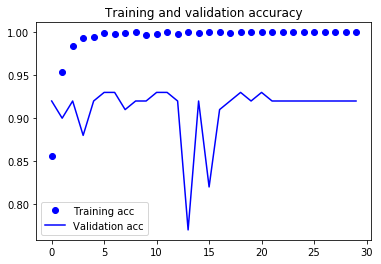

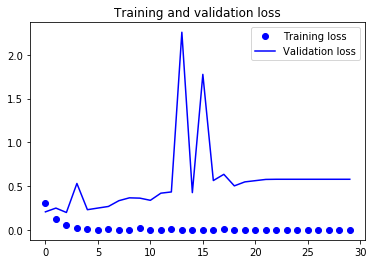

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Gördüğümüz gibi validation ve training loss'ları oldukça kötü seviyede. Bu durumda bu model gerçek dünyaya uyumlu olamaz ve işe yaramaz. Training accuracy gittikçe yükselirken (neredeyse 1 e geliyor.) yani ezberlerken (overfitting) validation accuracy pekte stabil bir hareket elde edememiştir. Aynı zamanda iki veride de training ve validation birbirinden çok uzakta. Bu durum modelin gerçekten de pek iyi olmadığını gösteriyor. İlk 3 ve 4. epochta birbirlerine yakınlarken diğerlerinde bir o kadar uzaktalar.